## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

> The total number of rows in the dataset is 294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

> The number of unique users in the dataset is 290584

d. The proportion of users converted.

In [5]:
total_users = len(df)
converted = len(df[df['converted'] == 1])

proportion = converted/total_users
proportion

0.11965919355605512

> Approximately 12%

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

> The The number of times the new_page and treatment don't match is 3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> No, they don't have missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True].copy()
df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

> There are 290584 unique user_ids in df2

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

> The repeated user has the id: 773192

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


> The rows that corresponf to that id are 1899 and 2893, and have the same values for *group:'treatment', landing_page:'new_page' and converted:'0'*.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# We drop the row 2893
df2.drop(2893, inplace=True)
#df2.drop(2893, inplace=True)

In [14]:
#Then we verify the operation
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
total= df2.converted.shape[0]
converted = len(df2[df2.converted == 1])

p_convertion = converted/total
p_convertion

0.11959708724499628

> The probability of an individual converting regardless of the page they receive is of approximately 0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
# First of all we calculate the probability that the individual is
# in the control group and has converted
control_and_conv = df2[(df2['group'] == 'control') & (df2['converted'] == 1)].shape[0]
probability_cc = control_and_conv/total

# Then we calculate the probability of being in the control group
control = df2[(df2['group'] == 'control')].shape[0]
probability_c = control/total
probability_c

# Finally we calculate the probability that an individual is converted given
# that is in the control group
probability_ccgiven = probability_cc / probability_c
probability_ccgiven

0.12038630450046119

> The probability is approximately of 0.1204

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
# First of all we calculate the probability that the individual is
# in the treatment group and has converted
treatment_and_conv = df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)].shape[0]
probability_tc = treatment_and_conv/total

# Then we calculate the probability of being in the treatment group
treatment = total-control
probability_t = treatment/total
probability_t

# Finally we calculate the probability that an individual is converted given
# that is in the treatment group
probability_tcgiven = probability_tc / probability_t
probability_tcgiven

0.11880806551510564

> The probability is approximately of 0.1188

d. What is the probability that an individual received the new page?

In [21]:
new_page = df2[(df2['landing_page'] == 'new_page')].shape[0]
probability_np = new_page/total
probability_np

0.5000619442226688

> The probability that an individual received the new page is approximately of 0.5001

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> The previous results suggest that the conversion rates between the new and old pages are quite similar, with the old pages with slightly more conversions. However, we do not have enough evidence to affirm that this suggestion applies to the population in general, since it was carried out in a sample. Therefore, we must apply an A / B test to obtain sufficient evidence to support the conclusion or reject it.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- ***Control***: The old page for the landing page being tested.

- ***Experiment***: The new page for the landing page being tested.

- ***Null hypothesis*** $H_{0}$: The new page leads to equal or fewer convertion rates than the old page (**$p_{new}$** - **$p_{old}$** **$\leq 0$**).

- ***Alternative hypothesis*** $H_{1}$: The new page leads to greater convertion rates than the old page (**$p_{new}$** - **$p_{old}$** **$\gt 0$**).

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
p_new = p_convertion
p_new

0.11959708724499628

> Given the previous statement, $p_{new}$ under the null is equal to the **converted rate** which is 0.1196

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = p_new
p_old

0.11959708724499628

> Given the previous statement, $p_{old}$ under the null is equal to the **converted rate** which is 0.1196

c. What is $n_{new}$, the number of individuals in the treatment group?

In [30]:
n_new = df2[df2['group'] == "treatment"].shape[0]
n_new

145310

> The  $n_{new}$, the number of individuals in the treatment group is 145310

d. What is $n_{old}$, the number of individuals in the control group?

In [31]:
n_old = df2[df2['group'] == "control"].shape[0]
n_old

145274

> The  $n_{old}$, the number of individuals in the treatment group is 145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [71]:
n_new

145310

In [72]:
p_new

0.11959708724499628

In [73]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [74]:
n_old

145274

In [75]:
p_old

0.11959708724499628

In [76]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [77]:
pnew_sim = new_page_converted.mean()
pnew_sim

0.11939302181542909

In [78]:
pold_sim = old_page_converted.mean()
pold_sim

0.11982873742032298

In [79]:
obs_diff = pnew_sim - pold_sim
obs_diff

-0.00043571560489388816

> The value of $p_{new}$ - $p_{old}$ for the simulated values is approximately of -0.000435

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [80]:
# We do the sample by using the random.binomial function, we divide each calculation by the size of each transation to
# normalize the value between 0 and 1
p_diffs = np.random.binomial(n_new, p_new, 10000)/n_new - np.random.binomial(n_old, p_old, 10000)/n_old

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

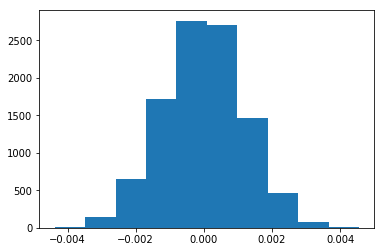

In [81]:
plt.hist(p_diffs);

> As expected since both convertion rates were true under the null hypothesis and showed similar distribution, the difference seems to not change that distribution. The null is very likely to generate the observed statistic.

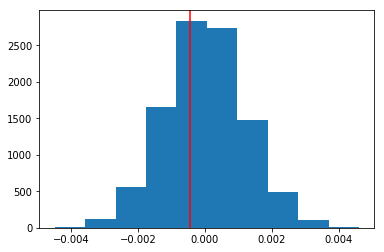

In [82]:
# To simulate from the null we create a normal distribution centered at 0
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [83]:
# Calculating the p-value
(p_diffs > (probability_tcgiven - probability_ccgiven)).mean()

0.90169999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> The value previously calculated is known as the **p-value**, which is the probability of observing the statistic if the null hypothesis is true. And in this case, it suggest that the probability observing the statistic is of 90%, which is pretty high. It supports the conclusion stated in the previous section, which says that the old page has a slightly higher convertion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [113]:
treatment_and_conv

17264

In [114]:
control_and_conv

17489

In [50]:
import statsmodels.api as sm

convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.

In [123]:
conv = [convert_old, convert_new]
total = [n_old, n_new]

# The default value for Ho is 0
z_stat, p_value = sm.stats.proportions_ztest(count=conv, nobs=total, alternative='smaller')

In [124]:
print(z_stat)
print(p_value)

1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z_stat and p_value suggest that it is 90% safe to accept the null hypothesis and only 10% safe to accept the alternative hypothesis, it is obvious that the alternative hypothesis does not satisfy the established Type I error rate of 5%. Thus, it can be stated that we have to stay with the old page since the new page does not lead to higher convertion rates.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Since we have only two possible outcomes from a categorical variable, logistic regression is the approach that should be performed for this case.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [160]:
df_model = df2.copy()
df_model.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [161]:
df_model['intercept'] = 1
df_model['ab_page'] = df['group']
# We add this line to map correctly the variable
df_model['ab_page'] = df_model['ab_page'].replace({'control':0, 'treatment':1})
df_model.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [173]:
logit_mod = sm.Logit(df_model['converted'], df_model[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [175]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        18:00:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br>

> The p value associated with **ab_page** is 0.190.
>
> The main difference is that the p_value obtained from the previous section **(Part II)** corresponds to a *one tailed* test, while the test implied by the regression model is a *two tailed test*. When we do logistic regression, we want to know if the  independent variable (ab_page) is significant for predicting the dependent variable (converted), this means that we are looking for a correlation. A high p_value for ab_page in the regression model implies that there is no correlation between the landing page type and the convertion rate. Thus, $p_{new}$ is equal to $p_{old}$ which is the $H_{0}$ for a two tailed test.
>
>$H_{0}:p_{new}=p_{old}$
>
>$H_{1}:p_{new}!=p_{old}$
>
> Here we can see that the p_value is too high ($\alpha \gt 0.05$) to accept the alternative. Therefore we stay with the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> A clear advantage of adding new terms to the regression model, is that will allow us to analyze multiple variables at the same time that were not considered for the previous parts. For example, if we get additional data from the users that might be proper to consider if we want to predict if an individual converts or not.
>
> On the other hand, the disadvantage of adding more terms is the presence of multicolinearity between variables (A state of very high intercorrelations among the independent variables), that could lead to some problems like:
- The partial regression coefficient might not be estimated precisely.
- Standard errors are likely to be high.
- More difficulty to assess the importance of the independent variables in explaining the causation caused by the dependent variable.
>
> *These problems may cause that our statistical inferences of the data might no be reliable.*
>
> *Source: (Multicolinearity)[https://en.wikipedia.org/wiki/Multicollinearity]*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns. Provide the statistical output as well as a written response to answer this question.

In [43]:
# Joining both datasets
df_countries = pd.read_csv('countries.csv')
df_countries = df_countries.join(df2.set_index('user_id'), on='user_id', how='left')
df_countries.head()

,user_id,country,timestamp,group,landing_page,converted
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [44]:
# We create the dummies for each variable
df_countries[['CA','UK','US']] = pd.get_dummies(df_countries['country'])
df_countries['intercept'] = 1
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 10 columns):
user_id         290584 non-null int64
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
CA              290584 non-null uint8
UK              290584 non-null uint8
US              290584 non-null uint8
intercept       290584 non-null int64
dtypes: int64(3), object(4), uint8(3)
memory usage: 16.4+ MB


In [50]:
logit_mod2 = sm.Logit(df_countries['converted'], df_countries[['intercept', 
                                                      'CA', 'US']])
results2 = logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:               1.521e-05
Time:                        19:12:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

> Between countries there seems to be a relationship with the conversion rate. When looking at the p_value for each country the p_value for users in Canada is closer to 0 than those from the US, which suggests that Canadian users have higher conversion rates than American users.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
df_countries['ab_page'] = df_countries['group']
# We add this line to map correctly the variable
df_countries['ab_page'] = df_countries['ab_page'].replace({'control':0, 'treatment':1})
df_countries['UK_ab_page'] = df_countries['UK'] * df_countries['ab_page']
df_countries['CA_ab_page'] = df_countries['UK'] * df_countries['ab_page']
df_countries['US_ab_page'] = df_countries['UK'] * df_countries['ab_page']
df_countries.head()

,user_id,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,ab_page,UK_ab_page,CA_ab_page,US_ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1,0,0,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1,1,1,1


In [51]:
logit_mod3 = sm.Logit(df_countries['converted'], df_countries[['intercept', 
                                                      'ab_page', 'UK', 'UK_ab_page']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:               2.036e-05
Time:                        22:57:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9876      0.009   -213.551      0.000      -2.006      -1.969
ab_page       -0.0236      0.013     -1.788      0.074      -0.050       0.002
UK            -0.0046      0.019     -0.247      0.805      -0.041       0.032
UK_ab_page     0.0345      0.026      1.307      0.191      -0.017       0.086
==============================================================================
"""

In [52]:
logit_mod3 = sm.Logit(df_countries['converted'], df_countries[['intercept', 
                                                      'ab_page', 'US', 'US_ab_page']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:               2.585e-05
Time:                        22:57:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1386
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0012      0.014   -144.688      0.000      -2.028      -1.974
ab_page       -0.0266      0.013     -2.059      0.039      -0.052      -0.001
US             0.0177      0.016      1.107      0.268      -0.014       0.049
US_ab_page     0.0464      0.024      1.941      0.052      -0.000       0.093
==============================================================================
"""

In [53]:
logit_mod3 = sm.Logit(df_countries['converted'], df_countries[['intercept', 
                                                      'ab_page', 'CA', 'CA_ab_page']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:               3.054e-05
Time:                        22:57:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08973
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.008   -243.339      0.000      -2.003      -1.971
ab_page       -0.0218      0.012     -1.761      0.078      -0.046       0.002
CA            -0.0398      0.027     -1.486      0.137      -0.092       0.013
CA_ab_page     0.0272      0.019      1.454      0.146      -0.009       0.064
==============================================================================
"""

> From the previous results we can see that effectively, an interaction between the page and country leads to signifficant effects on conversion. For all the countries the p_value for the variable *ab_page* was lower than with the ab_page alone. Also in the case of the US, the p_value of the interaction between these two variables is almost acceptable, with a value of 0.052.

<a id='intro'></a>
### Conclusion

From the results obtained from the A / B test, taking into account only the design of the page, we can say that the company must keep the previous page. However, if we analyze other factors (such as the country in this case), we could consider performing more tests and obtaining more records, since there was a positive effect on the acceptance of the new page, due to the interaction between the variables (especially for case of US users).

In [116]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0